In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib

from pmdarima import auto_arima

import pandas_datareader as dataR
from datetime import date

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [46]:
#Saham yang akan dimodelkan
#,"ASII.JK","ICBP.JK","JSMR.JK"
tickers = ["ICBP.JK"]
#range dari tanggal yang dibutuhkan
today = date.today()
# print(today)
start_date = '2010-01-01'
end_date = today
# end_date = '2022-03-10'
#ambil data
panel_data = dataR.DataReader(tickers, 'yahoo',start_date, end_date)
panel_data


close = panel_data["Close"]
dataframe = close
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[1837.5],
       [1875. ],
       [1862.5],
       ...,
       [7475. ],
       [7500. ],
       [7550. ]], dtype=float32)

In [47]:
# from sklearn.preprocessing import MinMaxScaler
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [48]:
stepwise_fit = auto_arima(close, start_p = 1, start_q = 1, max_p =3, max_q = 3,m=12,start_P=0,seasonal=True,d=None, D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=44126.823, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=39089.517, Time=5.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=41746.090, Time=4.87 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=44136.741, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=39887.343, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=38727.905, Time=20.92 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=28.90 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.88 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=44096.416, Time=4.30 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=38727.615, Time=30.71 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=39090.290, Time=8.78 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=41.85 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.50 sec
 ARIMA(3,0,0)(2,1,0)[12] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3034
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood              -19356.898
Date:                             Thu, 24 Mar 2022   AIC                          38725.796
Time:                                     23:42:40   BIC                          38761.878
Sample:                                          0   HQIC                         38738.770
                                            - 3034                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6823      0.129     13.062      0.000       1.430       1.935
ar.L2         -0.6949      0.122     -5.719      0.000      -0.933      -0.457
ma.L1         -0.7690      0.124     -6.201      0.000      -1.012      -0.526
ar.S.L12      -0.6667      0.011    -59.654      0.000      -0.689      -0.645
ar.S.L24      -0.3426      0.012    -28.536      0.000      -0.366      -0.319
sigma2      2.135e+04    304.582     70.102      0.000    2.08e+04    2.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3219.10
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model = SARIMAX(close, order=(2,0,1),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             ICBP.JK   No. Observations:                 3034
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood              -19356.898
Date:                             Thu, 24 Mar 2022   AIC                          38725.796
Time:                                     23:50:16   BIC                          38761.878
Sample:                                          0   HQIC                         38738.770
                                            - 3034                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6823      0.129     13.062      0.000       1.430       1.935
ar.L2         -0.6949      0.122     -5.719      0.000      -0.933      -0.457
ma.L1         -0.7690      0.124     -6.201      0.000      -1.012      -0.526
ar.S.L12      -0.6667      0.011    -59.654      0.000      -0.689      -0.645
ar.S.L24      -0.3426      0.012    -28.536      0.000      -0.366      -0.319
sigma2      2.135e+04    304.582     70.102      0.000    2.08e+04    2.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3219.10
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

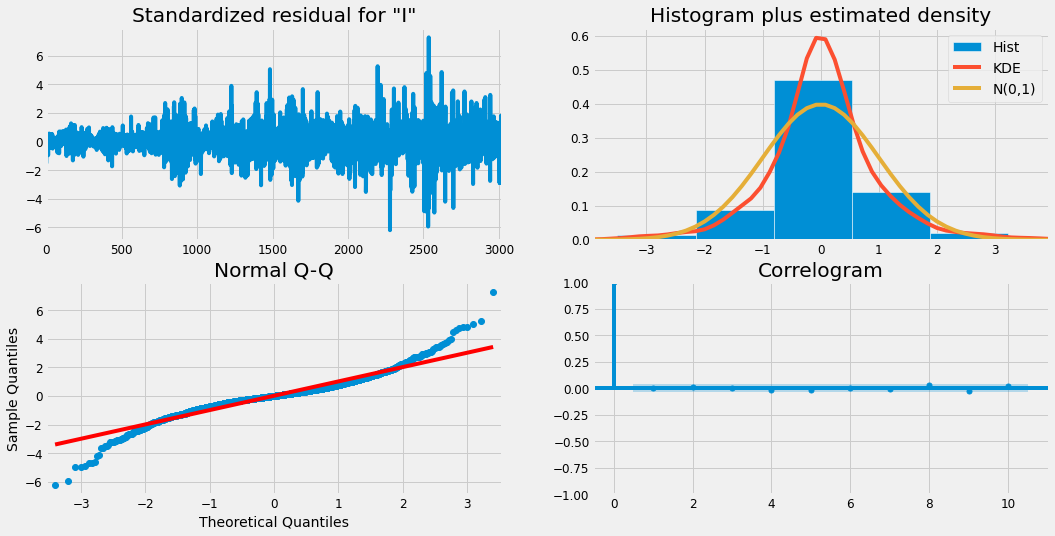

In [50]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

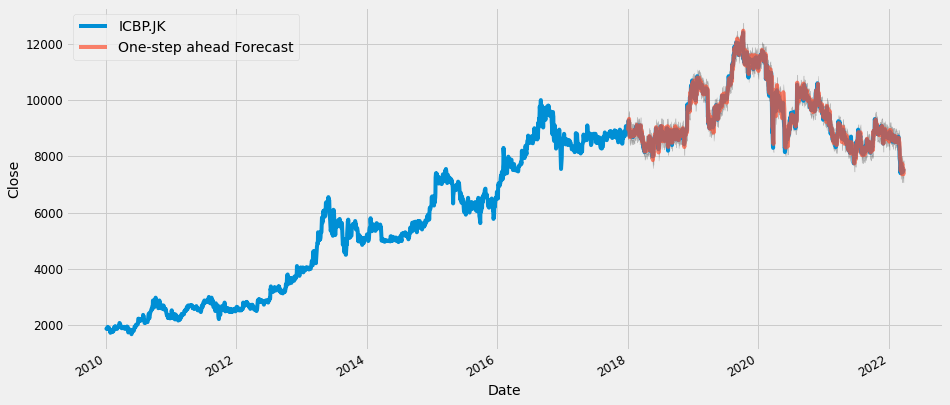

In [51]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = close['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.savefig('Arima_icbp_fix')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

array_forecasted = pred.predicted_mean
array_truth = close['2018-01-01':]
mae = mean_absolute_error(array_forecasted, array_truth)
print('The Mean absolute Error of our forecasts is {}'.format(round(mae, 2)))
mse = mean_squared_error(array_forecasted, array_truth)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
from sklearn.metrics import r2_score
r2 = r2_score(array_forecasted,array_truth)
print('The R2 of our forecasts is {}'.format(round(r2, 2)))

The Mean absolute Error of our forecasts is 128.83
The Root Mean Squared Error of our forecasts is 184.73
The R2 of our forecasts is 0.97


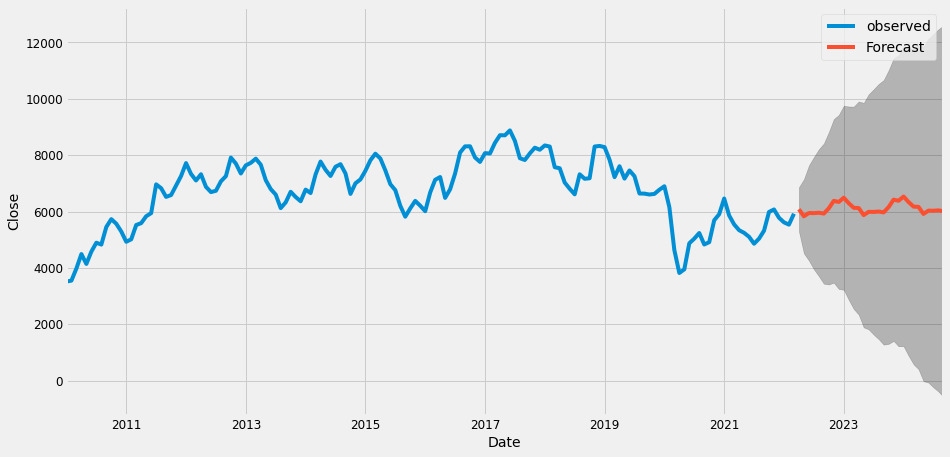

In [ ]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = close.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
# plt.savefig("arima_forecast_antm")
plt.show()

In [ ]:
forecast = results.forecast(steps=30)

print(forecast)

2022-04-01    2799.899022
2022-05-01    2710.131406
2022-06-01    2706.960727
2022-07-01    2702.373942
2022-08-01    2772.381234
2022-09-01    2746.386789
2022-10-01    2748.726924
2022-11-01    2758.019974
2022-12-01    2817.618308
2023-01-01    3057.788480
2023-02-01    3092.036875
2023-03-01    2901.169450
2023-04-01    2882.439424
2023-05-01    2861.860163
2023-06-01    2813.279684
2023-07-01    2858.302311
2023-08-01    2860.201217
2023-09-01    2849.463382
2023-10-01    2852.514758
2023-11-01    2854.743092
2023-12-01    2876.661505
2024-01-01    2961.279779
2024-02-01    2980.014735
2024-03-01    3011.536494
2024-04-01    3067.310861
2024-05-01    3027.231065
2024-06-01    2991.449205
2024-07-01    3022.489565
2024-08-01    3043.584620
2024-09-01    3028.546754
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# from fbprophet import Prophet
# df_model = Prophet(interval_width=0.95)
# df_model.fit(df)

# df_forecast = df_model.make_future_dataframe(periods=36, freq='MS')
# df_forecast = df_model.predict(df_forecast)